# UNSPERVISED LEARNING

## K MEANS CLUSTERING


```
1. import necessary libraries.
2. import dataset.
3. Data preprocessing
4. Select the feature to cluster.
5. Find the optimal number of clusters -- elbow method.
6. Train the model on dataset using optimal cluster value k.
7. Visualise the cluster.
```



# 1. import necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. import dataset.

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 3. Select the feature to cluster.

In [ ]:
# Selecting annual income and spending as features for clustering.

X = df.iloc[:, 3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
type(X)

numpy.ndarray

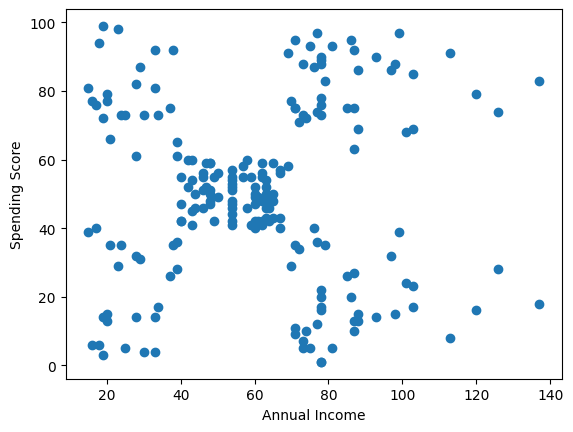

In [ ]:
plt.scatter(X[:, 0], X[:, 1]) # this command doesn't run with dataframes as observed in this case
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# 4. Find the optimal number of clusters -- elbow method.

In [ ]:
from sklearn.cluster import KMeans

# Trying different values of k and calculating WCSS for each value of k
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init="k-means++", random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #savind wcss value in a list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

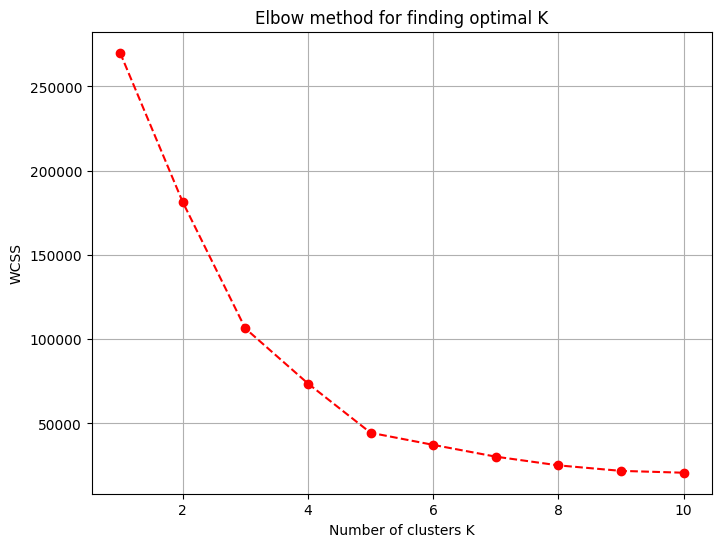

In [ ]:
# PLOTTING ELBOW METHOD GRAPH

plt.figure(figsize = (8,6))
plt.plot(range(1,11), wcss, "o--", color="red")
plt.title("Elbow method for finding optimal K")
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [ ]:
# Taking K=5 instead of K=3 coz WCSS value is low

# 6. Train the model on dataset using optimal cluster value k.

In [ ]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=0) #"k-means++" means initializing the random clusters
#return a label for data based on their cluster.
Y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
# annual incomes that belong to cluster 0
X[Y_kmeans == 0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [ ]:
X[Y_kmeans == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]])

# 7. Visualise the cluster.

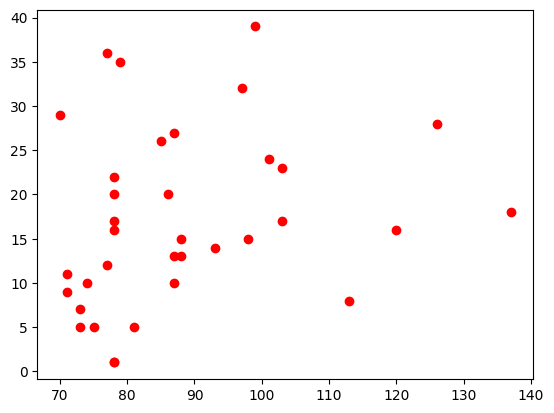

In [ ]:
plt.scatter(X[Y_kmeans == 0,0], X[Y_kmeans == 0,1], color = "red", label="Cluster 1")

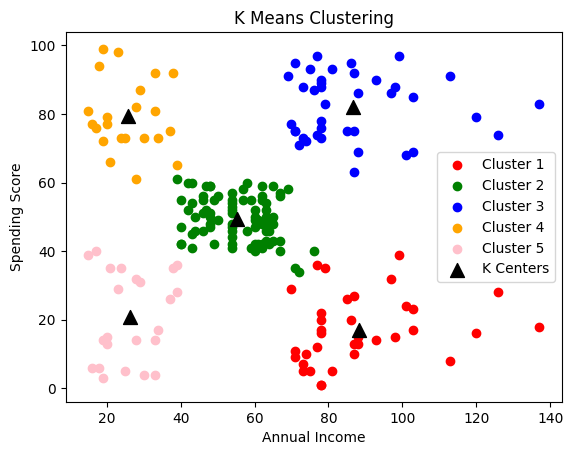

In [ ]:
plt.scatter(X[Y_kmeans == 0,0], X[Y_kmeans == 0,1], color = "red", label="Cluster 1")
plt.scatter(X[Y_kmeans == 1,0], X[Y_kmeans == 1,1], color = "green", label="Cluster 2")
plt.scatter(X[Y_kmeans == 2,0], X[Y_kmeans == 2,1], color = "blue", label="Cluster 3")
plt.scatter(X[Y_kmeans == 3,0], X[Y_kmeans == 3,1], color = "orange", label="Cluster 4")
plt.scatter(X[Y_kmeans == 4,0], X[Y_kmeans == 4,1], color = "pink", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = "^", s = 100, color = "black", label = "K Centers")
plt.legend()

plt.title("K Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
kmeans.predict([[23,45]])

array([4], dtype=int32)